<h2><center>Movie Review Classification</center></h2>

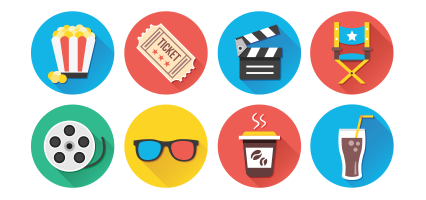

<h3>Objective:</h3>

Classifiy moview reviews as positive or negative based on text content on reviews.

Dataset - IMDB

Type of problem : Binary Classification

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### 1. LOADING THE IMDB DATASET

Just like MNIST(Modified National Institute of Standards and Technology) dataset, the IMDB(Internet Movie Database) dataset comes packaged with keras. It has already been preprocessed, the reviews(sequence of words) have been transformed into sequence of integers(kind of mapping), where each integer stands for a specific word in dictionary.

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Here the argument num_words = 10000 means we will keep only the top 10,000 most frequent words in the training dataset.

### 2. EDA

#### 2.1 Dataset Insights

In [4]:
train_data[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
unique, counts = np.unique(train_labels, return_counts=True)

print(dict(zip(unique, counts)))

{0: 12500, 1: 12500}


train_data and test_data are list of reviews , each review is a list of words indices(encoding of sequence of words). 

train_labels and test_labels are list of 0s and 1s where 0 stands for Negative and 1 stands for Positive.

#### 2.2 Decoding reviews back to english words

In [7]:
word_index = imdb.get_word_index()    # word_index is a dictionary mapping words to an integer index

# Reverse it , since we need mapping integers indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])    

decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In above decoded_review , the indices are offset by 3 since 0, 1, and 2 are reversed indices for padding, start of sequence  and unknown

#### 2.3 Preparing the Data

Since we can not feed 'list' of integers to a neural network. So we have to turn lists into 'tensors'.
We have two ways to do so:
1. Pad Lists : Pad the lists so that they all have the same length , turn them into integer tensor of shape (samples,                          word_indices).
2. One-hot encode the lists : To turn them into vectors of 0s and 1s. For e.g. [3, 5] sequence into a 10,000 dim vector that                                   would be all 0s except for indices 3 and 5 which would be 1s. Then use Dense layer as first layer                                 in the NN.  

In [8]:
# Using One-hot encoding 
def one_hot_encode(sequence, dimension=10000):
    
    results = np.zeros((len(sequence), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    
    for i, sequence in enumerate(sequence):
        
        results[i, sequence] = 1 # Sets specific indices of results to 1s
        
    return results

In [9]:
X_train = one_hot_encode(train_data)

X_test = one_hot_encode(test_data)

In [10]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
# Vectorizing labels as well
Y_train = np.asarray(train_labels).astype('float32')

Y_test = np.asarray(test_labels).astype('float32')

Now the data is read to be fed into a neural network.

### 3. BUILDING THE NETWORK

Network Architecture:
1. Two intermediate layers of 16 hidden units each
2. A third layer that will output the scalar prediction regarding the sentiment of the current review

<img src='Network Architecture.png'>

In [12]:
from keras import models
from keras import layers

import time

#### 3.1 Building Network

In [13]:
def create_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    
    model.add(layers.Dense(16, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [14]:
model = create_model()

#### 3.2 Compiling the model 

In [15]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

Since we are solving a binary classification problem and the output of the network is a probability, it is best to use the binary_crossentropy as loss, we can also use MSE.

In [16]:
# Validation Dataset
x_val = X_train[:10000]

partial_x_train = X_train[10000:]

y_val = Y_train[:10000]

partial_y_train = Y_train[10000:]

#### 3.3 Training the model

In [17]:
# Training the model

start_time = time.time()

history = model.fit(partial_x_train, partial_y_train, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (x_val, y_val),
                    verbose = 1)

end_time = time.time()

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5352 - accuracy: 0.7785 - val_loss: 0.4080 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3309 - accuracy: 0.8976 - val_loss: 0.3239 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2359 - accuracy: 0.9250 - val_loss: 0.3031 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1841 - accuracy: 0.9428 - val_loss: 0.3121 - val_accuracy: 0.8742
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1491 - accuracy: 0.9551 - val_loss: 0.3353 - val_accuracy: 0.8654
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1252 - accuracy: 0.9613 - val_loss: 0.2912 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1034 - accuracy: 0.9705 - val_loss: 0.3055 - val_accuracy: 0.8852
Epoch 8/20
30

In [18]:
print("Training Time : ", end_time - start_time)

Training Time :  7.434112071990967


#### 3.4 Visualizing Training Vs Validation: loss and accuracy

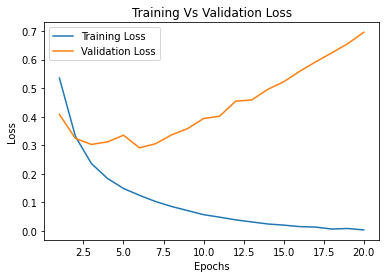

In [19]:
history_metadata = history.history

loss = history_metadata['loss']

val_loss = history_metadata['val_loss']

epochs = range(1, len(history_metadata['accuracy']) + 1)

plt.plot(epochs, loss, label='Training Loss')

plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Training Vs Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

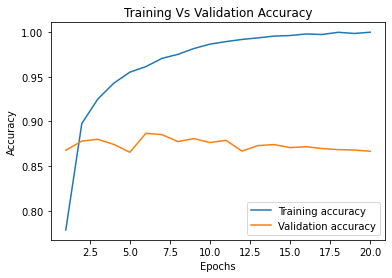

In [20]:
accuracy = history_metadata['accuracy']

val_accuracy = history_metadata['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')

plt.plot(epochs, val_accuracy, label='Validation accuracy')

plt.title('Training Vs Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

Observations:
* Training loss decreases with every epoch and training accuracy increases with every epoch, that we can expect when running the gradient descent optimizations.
* However at the 3rd epoch the validation loss and val_acc seems to peak.

#### 3.5 Evaluating on Test Dataset

In [22]:
results = model.evaluate(X_test, Y_test)

print(results)

782/782 [==============================] - 1s 825us/step - loss: 0.7560 - accuracy: 0.8508
[0.7559935450553894, 0.8507999777793884]


With this approach we are able to achieve an accuracy of 85%

In [23]:
#Predictions
model.predict(X_test)

782/782 [==============================] - 1s 719us/step


array([[0.01115896],
       [1.        ],
       [0.9964631 ],
       ...,
       [0.0056425 ],
       [0.00744592],
       [0.8546825 ]], dtype=float32)

As we can observe the network is confident for some samples(0.99 or more) but less confident for others.